In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

plt.style.use('default')

# Персептрон Розенблатта

![](https://miro.medium.com/max/875/1*ofVdu6L3BDbHyt1Ro8w07Q.png)

In [2]:
class Perceptron(nn.Module):

    def __init__(self, input_shape, otput_shape):
        super().__init__()
        self.fc = nn.Linear(input_shape, otput_shape)

    def forward(self, x):
        x = self.fc(x)
        return torch.heaviside(x, torch.tensor([0.5]))

    def fit(self, X_train, y_train, num_epochs):
        for i in range(num_epochs):
            for X, y in zip(X_train,y_train):
                output = self.forward(X)
                error = y - output
                with torch.no_grad():
                    for w, e in zip(self.fc.weight, error):
                        w += e * X
                    self.fc.bias += error

# Два класса, линейно разделимая выборка

## Decision bounds

In [3]:
def plot_decision_bounds(X, Y, model):
    X_np = X.detach().numpy()
    Y_np = Y.detach().numpy()

    x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
    y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

    Z  = model.forward(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()

    Z = Z.reshape(xx.shape)
    colors1 = ['pink', 'skyblue', 'red']
    plt.contourf(xx, yy, Z, colors = colors1, extend='both')
    plt.axis('off')

    plt.scatter(X_np[:, 0], X_np[:, 1], c=Y_np[:,0], s = 50)

## Train model

In [4]:
X_train = torch.tensor([
            [0.3, 2],
            [4.9, -2.2],
            [-0.9, -0.4],
            [2.6, 3.1],
            [-4, -3.3],
            [-1.5, -4.5]
            ])

y_train = torch.tensor([
            [0],
            [0],
            [1],
            [0],
            [1],
            [1]
            ], dtype = torch.float32)

X_train, y_train

(tensor([[ 0.3000,  2.0000],
         [ 4.9000, -2.2000],
         [-0.9000, -0.4000],
         [ 2.6000,  3.1000],
         [-4.0000, -3.3000],
         [-1.5000, -4.5000]]),
 tensor([[0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.]]))

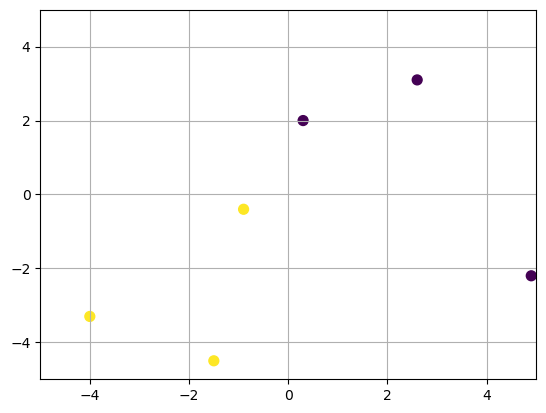

In [5]:
plt.scatter(x = X_train[:,0], y = X_train[:,1], c= y_train[:,0], s = 50)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

In [6]:
model = Perceptron(X_train.shape[1],y_train.shape[1])
print(model)

Perceptron(
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


In [7]:
w = model.fc.weight.data[0]
b = model.fc.bias.data
print(f'Initial weights: {w}')
print(f'Initial bias: {b}')

Initial weights: tensor([ 0.4092, -0.3584])
Initial bias: tensor([0.2472])


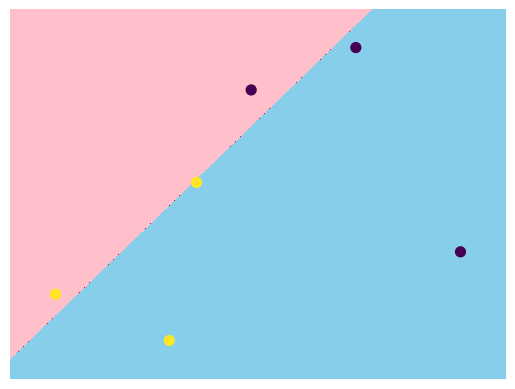

In [8]:
plot_decision_bounds(X_train, y_train, model)

In [9]:
model.fit(X_train, y_train, 5)

In [10]:
w = model.fc.weight.data[0]
b = model.fc.bias.data
print(f'Final weights: {w}')
print(f'Final bias: {b}')

Final weights: tensor([-5.9908, -2.6584])
Final bias: tensor([0.2472])


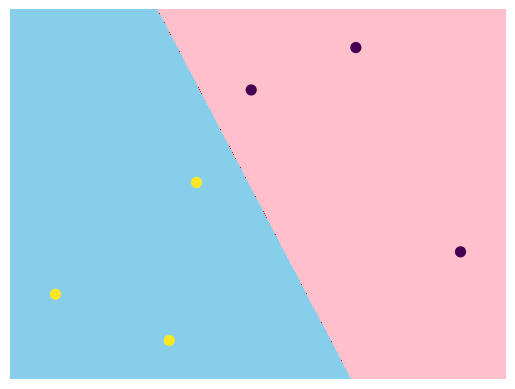

In [11]:
plot_decision_bounds(X_train, y_train, model)

In [13]:
y_pred = model.forward(X_train)
print('MAE: ', mean_absolute_error(y_train.detach().numpy(), y_pred.detach().numpy()))

MAE:  0.0


## Test model

In [14]:
X_test = torch.FloatTensor(10, 2).uniform_(-5, 5)
X_test

tensor([[ 2.3061, -1.1441],
        [-3.1864,  0.5409],
        [ 2.3079,  2.1424],
        [ 1.0470, -3.0850],
        [ 0.2993, -2.5488],
        [ 1.9326,  3.1133],
        [-2.0922, -1.6926],
        [ 2.0815,  1.5844],
        [-3.0788, -0.6004],
        [-2.6072, -2.5183]])

In [15]:
y_pred = model.forward(X_test)
y_pred

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.]], grad_fn=<NotImplemented>)

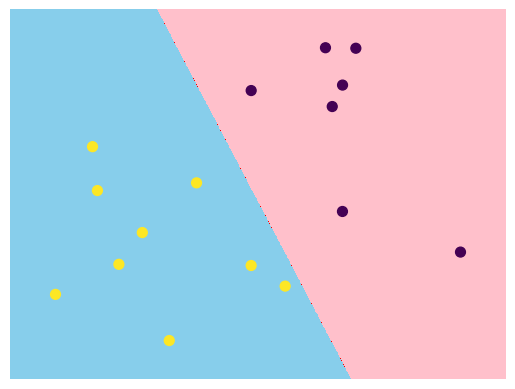

In [16]:
plot_decision_bounds(torch.cat((X_train, X_test), 0), torch.cat((y_train, y_pred), 0), model)

# Два класса, линейно неразделимая выборка

## Train model

In [17]:
X_train = torch.tensor([[0.3, 2],
          [4.9, -2.2],
          [-0.9, -0.4],
          [-2.6, 3.1],
          [-4, -3.3],
          [-1.5, -4.5]])

y_train = torch.tensor([[0],
          [0],
          [1],
          [0],
          [0],
          [1]])

X_train, y_train

(tensor([[ 0.3000,  2.0000],
         [ 4.9000, -2.2000],
         [-0.9000, -0.4000],
         [-2.6000,  3.1000],
         [-4.0000, -3.3000],
         [-1.5000, -4.5000]]),
 tensor([[0],
         [0],
         [1],
         [0],
         [0],
         [1]]))

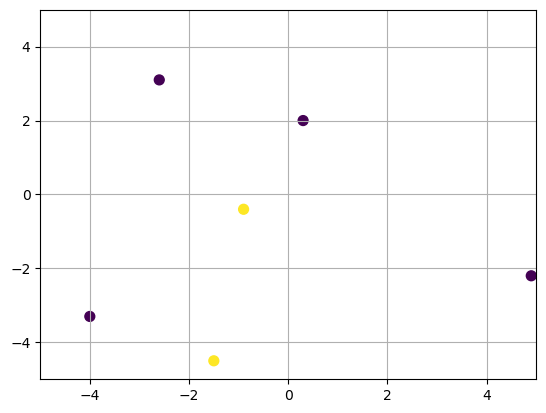

In [18]:
plt.scatter(x = X_train[:,0], y = X_train[:,1], c= y_train[:,0], s = 50)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

In [29]:
model = Perceptron(X_train.shape[1],y_train.shape[1])
print(model)

Perceptron(
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
w = model.fc.weight.data[0]
b = model.fc.bias.data
print(f'Initial weights: {w}')
print(f'Initial bias: {b}')

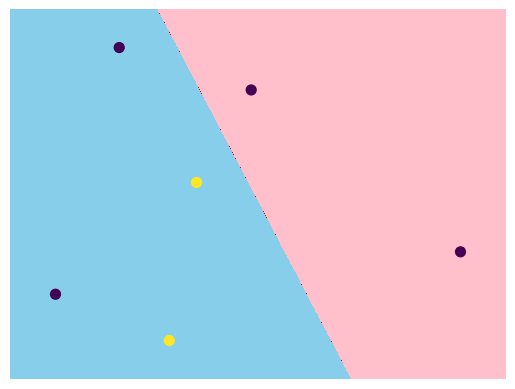

In [21]:
plot_decision_bounds(X_train, y_train, model)

In [22]:
model.fit(X_train, y_train, 50)

In [23]:
w = model.fc.weight.data[0]
b = model.fc.bias.data
print(f'Final weights: {w}')
print(f'Final bias: {b}')

Final weights: tensor([-1.3908, -3.4584])
Final bias: tensor([-6.7528])


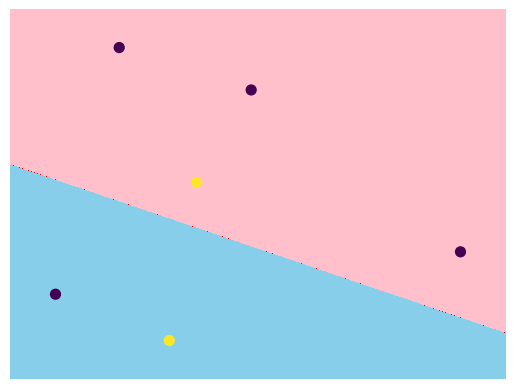

In [24]:
plot_decision_bounds(X_train, y_train, model)

In [25]:
y_pred = model.forward(X_train)
print('MAE: ', mean_absolute_error(y_train.detach().numpy(), y_pred.detach().numpy()))

MAE:  0.3333333333333333


# Четыре класса, линейно разделимая выборка

## Decision bounds

In [63]:
def plot_decision_bounds(X, Y, model):
    X_np = X.detach().numpy()

    x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
    y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

    Z = model.forward(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)).detach().numpy()
    
    colors1 = ['pink', 'skyblue', 'white',]
    Z1 = Z[:,0].reshape(xx.shape)
    plt.contourf(xx, yy, Z1, colors = colors1, extend='both')
    colors2 = ['lime', 'lightcoral', 'white']
    Z2 = Z[:,1].reshape(xx.shape)
    plt.contourf(xx, yy, Z2, colors = colors2, extend='both', alpha = 0.5)
    
    plt.axis('off')
    c = {
        'tensor([0., 0.])' : 0,
        'tensor([0., 1.])' : 1,
        'tensor([1., 0.])' : 2,
        'tensor([1., 1.])' : 3
        }
    plt.scatter(X_np[:, 0], X_np[:, 1], c= [c[str(key)] for key in Y], s = 50)

## Train model

In [64]:
X_train = torch.tensor([
            [-3.5, -4.9],
            [-0.7, 3.3],
            [1.1,0.2],
            [3.6, -4.1],
            [4, -4],
            [0.1, -3.6],
            [0.5, -5],
            [2.6, 3.4]
            ])

y_train = torch.tensor([
            [1,0],
            [0,0],
            [0,0],
            [0,1],
            [0,1],
            [1,0],
            [1,0],
            [0,0]
            ], dtype = torch.float32)

X_train, y_train

(tensor([[-3.5000, -4.9000],
         [-0.7000,  3.3000],
         [ 1.1000,  0.2000],
         [ 3.6000, -4.1000],
         [ 4.0000, -4.0000],
         [ 0.1000, -3.6000],
         [ 0.5000, -5.0000],
         [ 2.6000,  3.4000]]),
 tensor([[1., 0.],
         [0., 0.],
         [0., 0.],
         [0., 1.],
         [0., 1.],
         [1., 0.],
         [1., 0.],
         [0., 0.]]))

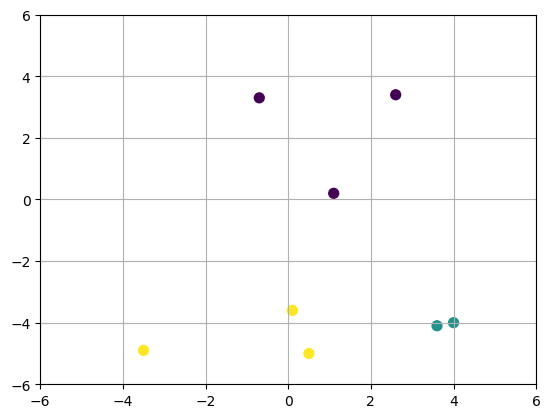

In [65]:
colors = {
        'tensor([0., 0.])' : 0,
        'tensor([0., 1.])' : 1,
        'tensor([1., 0.])' : 2,
        'tensor([1., 1.])' : 3
        }
plt.scatter(x = X_train[:,0], y = X_train[:,1], c= [colors[str(key)] for key in y_train], s = 50)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid()

In [76]:
model = Perceptron(X_train.shape[1],y_train.shape[1])
print(model)

Perceptron(
  (fc): Linear(in_features=2, out_features=2, bias=True)
)


In [77]:
w = model.fc.weight.data
b = model.fc.bias.data
print(f'Initial weights: {w}')
print(f'Initial bias: {b}')

Initial weights: tensor([[ 0.4866, -0.5509],
        [ 0.4302,  0.1001]])
Initial bias: tensor([0.2325, 0.1074])


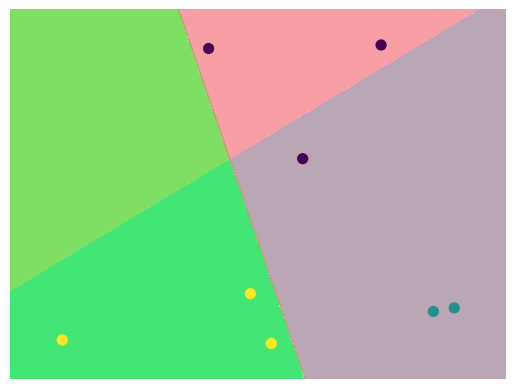

In [78]:
plot_decision_bounds(X_train, y_train, model)

In [79]:
model.fit(X_train, y_train, 50)

In [80]:
w = model.fc.weight.data
b = model.fc.bias.data
print(f'Final weights: {w}')
print(f'Final bias: {b}')

Final weights: tensor([[-6.5134, -4.4509],
        [ 3.8302, -0.5999]])
Final bias: tensor([-1.7675, -8.8926])


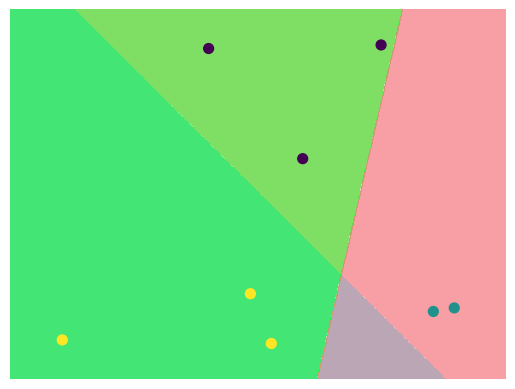

In [81]:
plot_decision_bounds(X_train, y_train, model)

In [82]:
y_pred = model.forward(X_train)
print('MAE: ', mean_absolute_error(y_train.detach().numpy(), y_pred.detach().numpy()))

MAE:  0.0


## Test model

In [92]:
X_test = torch.FloatTensor(10, 2).uniform_(-5, 5)
X_test

tensor([[-3.7828, -4.9361],
        [ 1.5772, -4.0304],
        [ 3.9485, -4.5863],
        [-2.9212, -0.0542],
        [ 2.9238,  4.3989],
        [ 0.4318,  0.8774],
        [ 4.1392, -0.4752],
        [-4.1755, -0.6768],
        [ 3.0565,  0.2356],
        [ 0.4129,  4.5920]])

In [93]:
X_test = torch.cat((X_test, torch.tensor([[2.5, -4.7]])))

In [94]:
with torch.no_grad():
    y_pred = model.forward(X_test)
y_pred

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 0.],
        [1., 1.]])

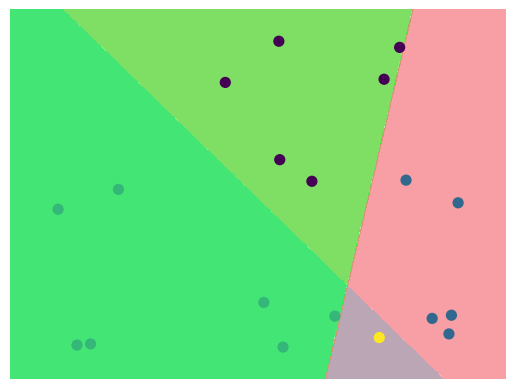

In [95]:
plot_decision_bounds(torch.cat((X_train, X_test), 0), torch.cat((y_train, y_pred), 0), model)